<a href="https://colab.research.google.com/github/Suemy-AZ/Modulo_2/blob/main/M2_SinLib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Suemy Aquino Zumaya
#A00828585
#08/2022
#Módulo 2

from google.colab import drive  # importa libreria
drive.mount("/content/gdrive");  # utiliza comando
#!pwd
#put your own path in google drive
%cd "/content/gdrive/MyDrive/7mo semestre/AD2022"
#!ls
import pandas as pd # importar libreria
columns = ["class","alcohol","malic","ash", "alcalinity","Mg","tphenols","flav","nonflav","proantho","color","hue","diluted","proline"]
# Open the file and create the data frame
df = pd.read_csv('wine.data',names = columns)
df

Mounted at /content/gdrive
/content/gdrive/MyDrive/7mo semestre/AD2022


,class,alcohol,malic,ash,alcalinity,Mg,tphenols,flav,nonflav,proantho,color,hue,diluted,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Ya que se tienen 3 clases se realizarán un ejercicio de clasificación donde se definirá una ecuación por cada clase con el fin de obtener la probabilidad según la o las características que se estudien eligiendo la más alta como clase final.

Se probará el caso de orden 1 y 2 con una ecuación de hipótesis de transformación de la regresión lineal y una función de costo log-loss además de que se utilizará gradiente descendiente para la obtimización de los coeficientes.

## Definiendo las funciones

In [3]:
##### Orden 1 ####
def orden1 (x_train,y_train,theta,alpha,h,j_i):
  n=len(y_train)
  for idx in range (1000):
    zDelta =[]
    zDeltaX=[]
    for x_i, y_i in zip (x_train,y_train):
      zDelta.append(h(x_i,theta)-y_i)
      zDeltaX.append ((h(x_i,theta)-y_i)*x_i)

    sJt0=sum(zDelta)
    sJt1=sum(zDeltaX)
   #Gradiente descendiente para optimización de theta
    theta[0]= theta[0]-alpha/n*sJt0 
    theta[1]=theta[1]-alpha/n*sJt1
  print(theta)
  return theta

##### Orden 2 #####
def orden2 (x_train,x2_train,y_train,theta,alpha,h,j_i):
  n=len(y_train)
  for idx in range (1000):
    zDelta =[]
    zDeltaX=[]
    zDeltaX2=[]
    
    for x_i, y_i,x2_i in zip (x_train,y_train,x2_train):
      zDelta.append(h(x_i,x2_i,theta)-y_i)
      zDeltaX.append ((h(x_i,x2_i,theta)-y_i)*x_i)
      zDeltaX2.append ((h(x_i,x2_i,theta)-y_i)*x2_i)

    sJt0=sum(zDelta)
    sJt1=sum(zDeltaX)
    sJt2=sum(zDeltaX2)
   #Gradiente descendiente para optimización de theta
    theta[0]= theta[0]-alpha/n*sJt0
    theta[1]=theta[1]-alpha/n*sJt1
    theta[2]=theta[2]-alpha/n*sJt2
  print(theta)
  return theta

#### Validar la theta obtenida Orden 2 ####
def validate2(x_c1t,x2t,y_c1t,x_c1v,x2v,y_c1v,theta,j2_i):
  n_t = len(y_c1v)
  n_v = len(y_c1t)

  # Validación
  zDelta = []
  for x_i, y_i, x2_i in zip(x_c1t,x2t,y_c1t):
    zDelta.append(j2_i(x_i,x2_i,y_i,theta))  

  sDelta = sum(zDelta)  
  J_validate = 1/(2*n_v)*sDelta


  # Entrenamiento
  zDelta = []
  for x_i, y_i,x2_i in zip(x_c1v,y_c1v,x2v):
    zDelta.append(j2_i(x_i,x2_i,y_i,theta))  

  sDelta = sum(zDelta)  
  J_train = 1/(2*n_t)*sDelta

  print(J_validate)
  print(J_train)

#### Validar la theta obtenida Orden 2 ####

def validate(x_c1t,y_c1t,x_c1v,y_c1v,theta):
  n_train = len(y_c1v)
  n_val = len(y_c1t)

  # Validación
  zDelta = []
  for x_i, y_i in zip(x_c1t,y_c1t):
    zDelta.append(j_i(x_i,y_i,theta))  

  sDelta = sum(zDelta)  
  J_validate = 1/(2*n_val)*sDelta


  # Entenamiento
  zDelta = []
  for x_i, y_i in zip(x_c1v,y_c1v):
    zDelta.append(j_i(x_i,y_i,theta))  

  sDelta = sum(zDelta)  
  J_train = 1/(2*n_train)*sDelta

  print(J_validate)
  print(J_train)

# Implementación del algoritmo para la característica "malic"



In [4]:
import numpy as np
x= df[["malic"]].to_numpy()
y= df[["class"]].to_numpy()

from sklearn.model_selection import train_test_split

#Se realizan la transformación a 0 y 1 dependiendo de la clase a la que pertenezca

c1=np.where(df["class"] == 1, 1,0 )
c2=np.where(df["class"] == 2, 1,0 )
c3=np.where(df["class"] == 3, 1,0 )

#Se dividen los datos entre entrenamiento y pruebas
x_c1t, x_c1v, y_c1t, y_c1v = train_test_split(x,c1,random_state=0)
x_c2t, x_c2v, y_c2t, y_c2v = train_test_split(x,c2,random_state=0)
x_c3t, x_c3v, y_c3t, y_c3v = train_test_split(x,c3,random_state=0)


## Orden 1

In [5]:
from math import e,log
h   = lambda x,theta: 1/(1+e**(-(theta[0]+theta[1]*x))) #Función de hipótesis (orden 1)
j_i = lambda x,y,theta: y*log(h(x,theta),e) + (1-y)*log(1-h(x,theta),e) #Función de costo

print("Theta clase 1")
theta11=orden1(x_c1t,y_c1t,[1,1],0.1,h,j_i)
print("Theta clase 2")
theta21=orden1(x_c2t,y_c2t,[1,1],0.1,h,j_i)
print("Theta clase 3")
theta31=orden1(x_c3t,y_c3t,[1,1],0.1,h,j_i)
print("\n")
print("Validación clase 1 [train test]")
validate(x_c1t,y_c1t,x_c1v,y_c1v,theta11)
print("Validación clase 2 [train test]")
validate(x_c2t,y_c2t,x_c2v,y_c2v,theta21)
print("Validación clase 3 [train test]")
validate(x_c3t,y_c3t,x_c3v,y_c3v,theta31)

Theta clase 1
[array([0.32021686]), array([-0.4639745])]
Theta clase 2
[array([1.0889121]), array([-0.70943867])]
Theta clase 3
[array([-3.50435379]), array([1.05933685])]


Validación clase 1 [train test]
-0.30255992406257737
-0.3166778820121002
Validación clase 2 [train test]
-0.30242474277247483
-0.3429307180162848
Validación clase 3 [train test]
-0.22834788202298198
-0.19489046898451873


### Visualización de la curva obtenida por cada clase

Text(0.5, 1.0, 'Clase 1 - Orden 1')

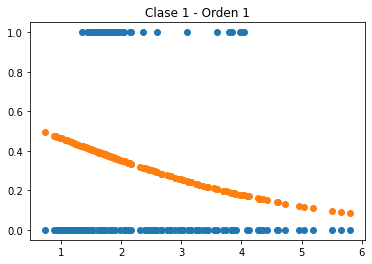

In [6]:
import matplotlib.pyplot as pt

pt.scatter(x,c1)
pt.scatter(x,h(x,theta11))

pt.title("Clase 1 - Orden 1")

Text(0.5, 1.0, 'Clase 2 - Orden 1')

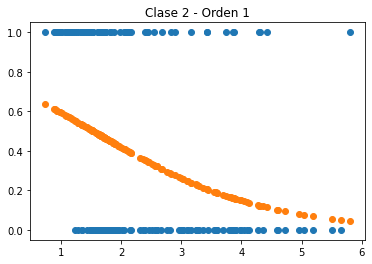

In [7]:
pt.scatter(x,c2)
pt.scatter(x,h(x,theta21))
pt.title("Clase 2 - Orden 1")

Text(0.5, 1.0, 'Clase 3 - Orden 1')

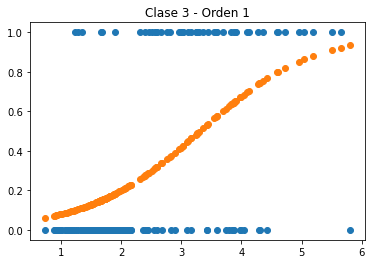

In [8]:
pt.scatter(x,c3)
pt.scatter(x,h(x,theta31))
pt.title("Clase 3 - Orden 1")

### Pruebas de predicción

In [9]:
#Prueba Clase 1
print("Predicción clase 1")
x0=x[50]  
y0=y[50]
prob= [h(x0,theta11),h(x0,theta21),h(x0,theta31)]

print("Valores x1: ",x0)
print("Probabilidad por clase",h(x0,theta11),h(x0,theta21),h(x0,theta31))

if max(prob)==prob[0]:
  pred=1
elif max(prob)==prob[1]:
  pred=2
else:
  pred=3

print("Clase predicción: ",pred)
print("Clase real: ",y0,"\n")

#Prueba Clase 2
print("Predicción clase 2")
x0=x[75]  
y0=y[75]
prob= [h(x0,theta11),h(x0,theta21),h(x0,theta31)]

print("Valores x1: ",x0)
print("Probabilidad por clase",h(x0,theta11),h(x0,theta21),h(x0,theta31))

if max(prob)==prob[0]:
  pred=1
elif max(prob)==prob[1]:
  pred=2
else:
  pred=3

print("Clase predicción: ",pred)
print("Clase real: ",y0,"\n")

#Prueba Clase 3
print("Predicción clase 3")
x0=x[150]  
y0=y[150]
prob= [h(x0,theta11),h(x0,theta21),h(x0,theta31)]

print("Valores x1: ",x0)
print("Probabilidad por clase",h(x0,theta11),h(x0,theta21),h(x0,theta31))

if max(prob)==prob[0]:
  pred=1
elif max(prob)==prob[1]:
  pred=2
else:
  pred=3

print("Clase predicción: ",pred)
print("Clase real: ",y0,"\n")

Predicción clase 1
Valores x1:  [1.73]
Probabilidad por clase [0.38167163] [0.46545095] [0.15819752]
Clase predicción:  2
Clase real:  [1] 

Predicción clase 2
Valores x1:  [1.88]
Probabilidad por clase [0.36538772] [0.43909578] [0.18052413]
Clase predicción:  2
Clase real:  [2] 

Predicción clase 3
Valores x1:  [3.12]
Probabilidad por clase [0.24464427] [0.24517077] [0.45035837]
Clase predicción:  3
Clase real:  [3] 



## Calificando el algoritmo

In [37]:
# Probamos con el conjunto de datos de prueba
prob= [[h(x_c1v,theta11)],[h(x_c1v,theta21)],[h(x_c1v,theta31)]]

len(prob)
np.size(prob)

135

In [50]:
from sklearn.metrics import r2_score, mean_squared_error
# Probamos con el conjunto de datos de prueba

y_pred=[]
for xx  in zip(x):
  y_p=0
  probb= [h(xx,theta11),h(xx,theta21),h(xx,theta31)]
  if max(probb)== probb[0]:
    y_p=1
  elif max(probb)== probb[1]:
    y_p=2
  else:
    y_p=3
  y_pred.append(y_p)


# Calculamos el coeficiente de determinación
CoD = r2_score(y, y_pred)
CoD

# Calculamos el MSE (Mean Squared Error)
MSE = mean_squared_error(y, y_pred)
MSE

0.5955056179775281

Predice parcialmente con probabilidades muy cercanas por lo que se espera que pueda mejorar con una ecuación de orden 2

# Implementación del algoritmo para la característica "malic" y "flav"

## Orden 2

In [ ]:
#Definir variable x2 como la característica
import numpy as np
from sklearn.model_selection import train_test_split
x2= (df[["flav"]].to_numpy())

xx= np.concatenate((x, x2), axis=1)

#Dividir los datos entre entrenamiento y pruebas

x_c1t, x_c1v, y_c1t, y_c1v = train_test_split(xx,c1,random_state=0)
x1_c1t_o2=x_c1t[:,0] 
x2_c1t_o2=x_c1t[:,1]
x1_c1v_o2=x_c1v[:,0]
x2_c1v_o2=x_c1v[:,1]

x_c2t, x_c2v, y_c2t, y_c2v = train_test_split(xx,c2,random_state=0)
x1_c2t_o2=x_c2t[:,0]   
x2_c2t_o2=x_c2t[:,1]
x1_c2v_o2=x_c2v[:,0]      
x2_c2v_o2=x_c2v[:,1]

x_c3t, x_c3v, y_c3t, y_c3v = train_test_split(xx,c3,random_state=0)
x1_c3t_o2=x_c3t[:,0]       
x2_c3t_o2=x_c3t[:,1]
x1_c3v_o2=x_c3v[:,0]     
x2_c3v_o2=x_c3v[:,1]



In [ ]:
h2   = lambda x,x2,theta: 1/(1+e**(-(theta[0]+theta[1]*x+theta[2]*x2))) #Ecuación de hipótesis (orden 2)
j2_i = lambda x,x2,y,theta: y*log(h2(x,x2,theta),e) + (1-y)*log(1-h2(x,x2,theta),e) #Función de costo

#Obtener theta de cada clase
print("Thetas clase 1")
theta12=orden2(x1_c1t_o2,x2_c1t_o2,y_c1t,[1,1,1],0.1,h2,j2_i) 
print("Thetas clase 2")
theta22=orden2(x1_c2t_o2,x2_c2t_o2,y_c2t,[1,1,1],0.1,h2,j2_i)
print("Thetas clase 3")
theta32=orden2(x1_c3t_o2,x2_c3t_o2,y_c3t,[1,1,1],0.1,h2,j2_i)
print("\n")

#Validar cada theta obtenida
print("Validación clase 1 [train test]")
validate2(x1_c1t_o2,x2_c1t_o2,y_c1t,x1_c1v_o2,x2_c1v_o2,y_c1v,theta12,j2_i)


print("Validación clase 2 [train test]")
validate2(x1_c2t_o2,x2_c2t_o2,y_c2t,x1_c2v_o2,x2_c2v_o2,y_c2v,theta22,j2_i)


print("Validación clase 3 [train test]")
validate2(x1_c3t_o2,x2_c3t_o2,y_c3t,x1_c3v_o2,x2_c3v_o2,y_c3v,theta32,j2_i)


Thetas clase 1
[-3.4846464350608986, -0.5948839539895606, 1.8563766409062188]
Thetas clase 2
[1.4896991831442108, -0.7238939016692265, -0.1904943288428385]
Thetas clase 3
[0.9782899157577533, 1.3109334537336657, -3.5057827316527215]


Validación clase 1 [train test]
-3.7773037905392215
-0.27791517020244383
Validación clase 2 [train test]
-0.45163975856960503
-0.34362104806578675
Validación clase 3 [train test]
1.7251385226846816
-0.04196641427463577


### Visualización de la curva obtenida por cada clase

Text(0.5, 1.0, 'Clase 1 - Orden 2')

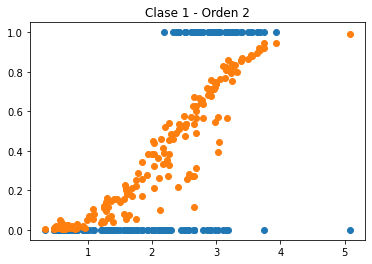

In [ ]:
import matplotlib.pyplot as pt

pt.scatter(x2,c1)
pt.scatter(x2,h2(x,x2,theta12))
pt.title("Clase 1 - Orden 2")

Text(0.5, 1.0, 'Clase 2 - Orden 2')

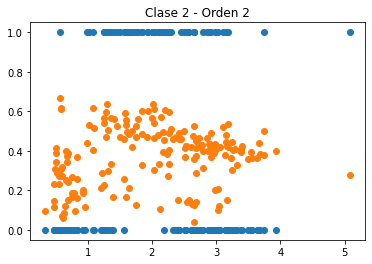

In [ ]:
pt.scatter(x2,c2)
pt.scatter(x2,h2(x,x2,theta22))
pt.title("Clase 2 - Orden 2")

Text(0.5, 1.0, 'Clase 3 - Orden 2')

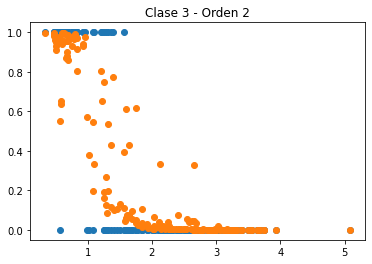

In [ ]:
pt.scatter(x2,c3)
pt.scatter(x2,h2(x,x2,theta32))

pt.title("Clase 3 - Orden 2")

### Pruebas de predicción

In [ ]:
#Prueba Clase 1
print("Predicción clase 1")
x0=x[50]  
x02=x2[50]
y0=y[50]
prob= [h2(x0,x02,theta12),h2(x0,x02,theta22),h2(x0,x02,theta32)]

print("Valores x1: ",x0,",x2: ",x02)
print("Probabilidad por clase",h2(x0,x02,theta12),h2(x0,x02,theta22),h2(x0,x02,theta32))

if max(prob)==prob[0]:
  pred=1
elif max(prob)==prob[1]:
  pred=2
else:
  pred=3

print("Clase predicción: ",pred)
print("Clase real: ",y0,"\n")

#Prueba Clase 2
print("Predicción clase 2")
x0=x[75]  
x02=x2[75]
y0=y[75]
prob= [h2(x0,x02,theta12),h2(x0,x02,theta22),h2(x0,x02,theta32)]

print("Valores x1: ",x0,",x2: ",x02)
print("Probabilidad por clase",h2(x0,x02,theta12),h2(x0,x02,theta22),h2(x0,x02,theta32))

if max(prob)==prob[0]:
  pred=1
elif max(prob)==prob[1]:
  pred=2
else:
  pred=3

print("Clase predicción: ",pred)
print("Clase real: ",y0,"\n")

#Prueba Clase 3
print("Predicción clase 3")
x0=x[150]  
x02=x2[150]
y0=y[150]
prob= [h2(x0,x02,theta12),h2(x0,x02,theta22),h2(x0,x02,theta32)]

print("Valores x1: ",x0,",x2: ",x02)
print("Probabilidad por clase",h2(x0,x02,theta12),h2(x0,x02,theta22),h2(x0,x02,theta32))

if max(prob)==prob[0]:
  pred=1
elif max(prob)==prob[1]:
  pred=2
else:
  pred=3

print("Clase predicción: ",pred)
print("Clase real: ",y0,"\n")

Predicción clase 1
Valores x1:  [1.73] ,x2:  [3.27]
Probabilidad por clase [0.8258586] [0.40478811] [0.00026976]
Clase predicción:  1
Clase real:  [1] 

Predicción clase 2
Valores x1:  [1.88] ,x2:  [1.57]
Probabilidad por clase [0.15597098] [0.45752823] [0.11292215]
Clase predicción:  2
Clase real:  [2] 

Predicción clase 3
Valores x1:  [3.12] ,x2:  [1.57]
Probabilidad por clase [0.08119852] [0.25579772] [0.39277163]
Clase predicción:  3
Clase real:  [3] 



Se logró predecir correctamente los casos dados con diferencias notorias en las probabilidades individuales por clase.